In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

## Load Boston Dataset

In [2]:
df = pd.read_csv('/content/Boston.csv')

In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# **1. Feedforward Neural Network**

## Data Preparation

In this block, we will split the dataset into `training` and `test` and scale all features to avoid over-emphasis on some features that have larger value ranges during the Gradient Descent Algorithm.

In [4]:
y = df['medv']
X = df.drop(['medv'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((379, 13), (127, 13), (379,), (127,))

In [6]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Train the model


In [7]:
# Define the model
model = keras.Sequential([
    keras.layers.Dense(3, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 664.0049 - mae: 23.9563 - val_loss: 567.7206 - val_mae: 22.1973
Epoch 2/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 646.1743 - mae: 23.5624 - val_loss: 563.7137 - val_mae: 22.1301
Epoch 3/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 634.7554 - mae: 23.4380 - val_loss: 559.8588 - val_mae: 22.0658
Epoch 4/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 637.4106 - mae: 23.4919 - val_loss: 556.3776 - val_mae: 22.0049
Epoch 5/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 614.8170 - mae: 22.9879 - val_loss: 553.0179 - val_mae: 21.9446
Epoch 6/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 617.5143 - mae: 23.1635 - val_loss: 549.6523 - val_mae: 21.8831
Epoch 7/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 605.6746 - mae: 22.7938 - val_loss: 546.3825 - val_mae: 21.8232
Epoch 8/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 642.8544 - mae: 23.4491 - val_loss: 543.1710 - val_mae: 21.7639
Epoch 9/5

### Actual vs. Predicted value for some random records

In [9]:
predictions = model.predict(X_test)

for i in np.random.choice(len(y_test), 50, replace=False):
  actual = y_test.iloc[i]
  pred = predictions[i][0]
  error = abs(actual-pred)
  print(f"Actual: {actual:.2f}, Predicted: {pred:.2f}, Error: {error:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Actual: 19.20, Predicted: 20.25, Error: 1.05
Actual: 21.10, Predicted: 20.89, Error: 0.21
Actual: 13.90, Predicted: 11.89, Error: 2.01
Actual: 14.20, Predicted: 4.21, Error: 9.99
Actual: 19.40, Predicted: 17.90, Error: 1.50
Actual: 27.50, Predicted: 4.21, Error: 23.29
Actual: 17.80, Predicted: 18.87, Error: 1.07
Actual: 22.60, Predicted: 26.91, Error: 4.31
Actual: 9.60, Predicted: 4.21, Error: 5.39
Actual: 24.00, Predicted: 30.15, Error: 6.15
Actual: 27.50, Predicted: 4.21, Error: 23.29
Actual: 35.40, Predicted: 32.42, Error: 2.98
Actual: 29.80, Predicted: 4.21, Error: 25.59
Actual: 17.40, Predicted: 15.51, Error: 1.89
Actual: 23.40, Predicted: 25.38, Error: 1.98
Actual: 23.20, Predicted: 22.94, Error: 0.26
Actual: 8.80, Predicted: 4.21, Error: 4.59
Actual: 20.90, Predicted: 20.51, Error: 0.39
Actual: 23.90, Predicted: 25.78, Error: 1.88
Actual: 25.30, Predicted: 26.06, Error: 0.76
Actual: 19.70, Predicted: 12.76, Error: 6.94
Actual: 50.00, Predict

## Evaluation

MSE and MAE on `test data`

In [10]:
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test MSE: {loss:.4f}, Test MAE: {mae:.4f}")

Test MSE: 68.6888, Test MAE: 5.2053


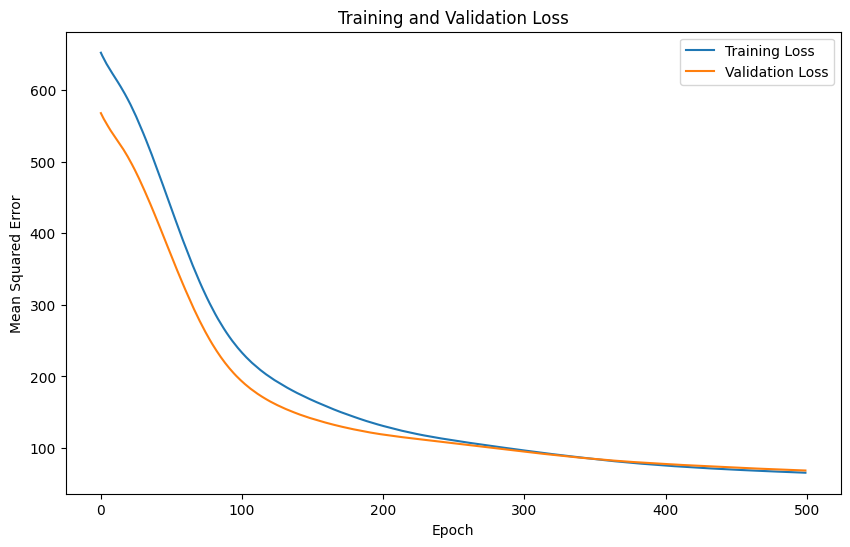

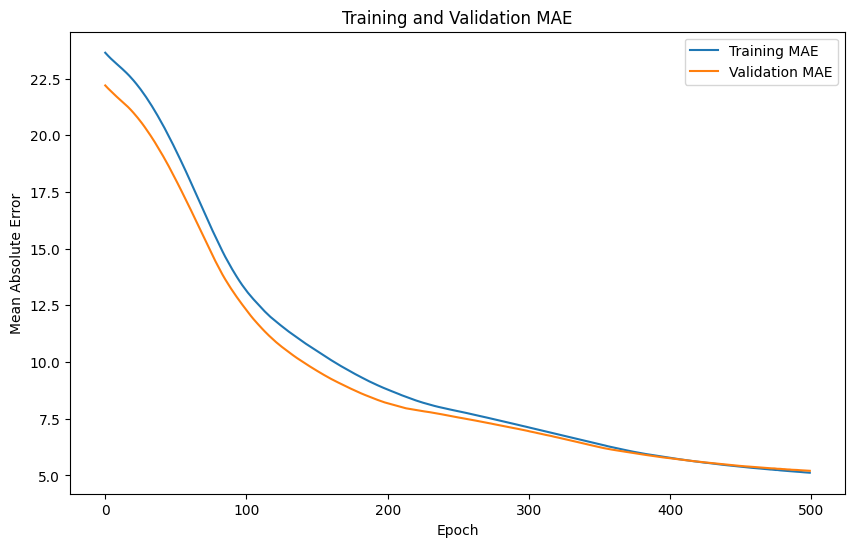

In [11]:
# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot the training and validation MAE
plt.figure(figsize=(10, 6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Validation MAE')
plt.legend()
plt.show()

↓

Acoording to above plots, our model has fitted well on dataset without overfitting or underfitting.

<br><br>

And you can see some information about my neural network's parameters below:

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 3)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 140 (564.00 B)

 Trainable params: 46 (184.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 94 (380.00 B)

# **2. Clustring**

## Train K-Means

In [13]:
df = pd.read_csv('/content/Boston.csv')

# Select only numeric features
numeric_cols = df.select_dtypes(include=['number']).columns
X = df[numeric_cols]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# Apply k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Add cluster labels to the dataframe
df['cluster'] = kmeans.labels_

### Display the first few rows with cluster assignments


In [15]:
print("First few rows with cluster assignments:\n")
df.head(10)

First few rows with cluster assignments:



,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,cluster
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,2
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,2
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,2
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,2
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,1
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1,1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5,1
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9,1


### Diving into Clusters


In [16]:
# Cluster Centers
cluster_centers_original = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers_original, columns=numeric_cols)
cluster_centers_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,11.052058,3.552714e-15,18.648462,0.076923,0.688237,5.953199,90.733333,1.998293,21.019231,636.282051,19.693590,293.351603,18.996538,16.192949
1,0.376542,2.157895e+00,10.042297,0.071770,0.520014,6.089837,69.257416,3.859259,4.449761,315.832536,18.667464,381.960909,12.379952,21.129665
2,0.181735,3.758156e+01,4.448298,0.056738,0.458352,6.940071,43.047518,5.687750,4.418440,292.900709,16.771631,389.250922,6.039574,31.626950


In [17]:
# Cluster Sizes
cluster_sizes = df['cluster'].value_counts().sort_index()
print("Cluster Sizes:")
print(cluster_sizes)

Cluster Sizes:
cluster
0    156
1    209
2    141
Name: count, dtype: int64


In [18]:
cluster_stats = df.groupby('cluster')['medv'].agg(['mean', 'std', 'median'])
print("Cluster Statistics of 'medv':")
print(cluster_stats)

Cluster Statistics of 'medv':
              mean       std  median
cluster                             
0        16.192949  7.971628    14.6
1        21.129665  4.036621    20.9
2        31.626950  8.918047    30.5


In [19]:
cluster_stats = df.groupby('cluster')['age'].agg(['mean', 'std', 'median'])
print("Cluster Statistics of 'age':")
print(cluster_stats)

Cluster Statistics of 'age':
              mean        std  median
cluster                              
0        90.733333  11.963025   94.95
1        69.257416  24.225669   73.90
2        43.047518  24.973076   35.90


⇓

So **3 clusters are meaningful.**

## Visualization Clusters

Now, We are going to use several dimensionality reduction algorithms (like <a href="https://www.ibm.com/think/topics/principal-component-analysis"> PCA</a> and <a href="https://www.datacamp.com/tutorial/introduction-t-sne">t-SNE</a>) to be able to visualize our clusters.

### PCA

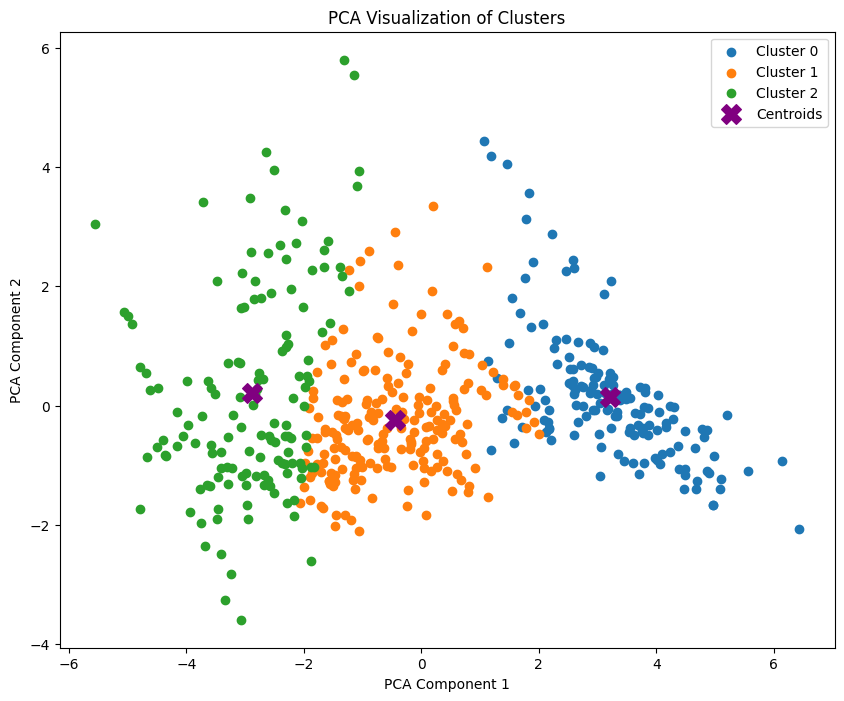

In [21]:
from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Plot the results
plt.figure(figsize=(10, 8))
for cluster in range(3):  # Assuming 3 clusters
    cluster_points = X_pca[df['cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')

# Plot the centroids
centroids_pca = pca.transform(kmeans.cluster_centers_)  # Apply PCA to centroids
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, marker='X', c='purple', label='Centroids')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization of Clusters')
plt.legend()
plt.show()

### t-SNE

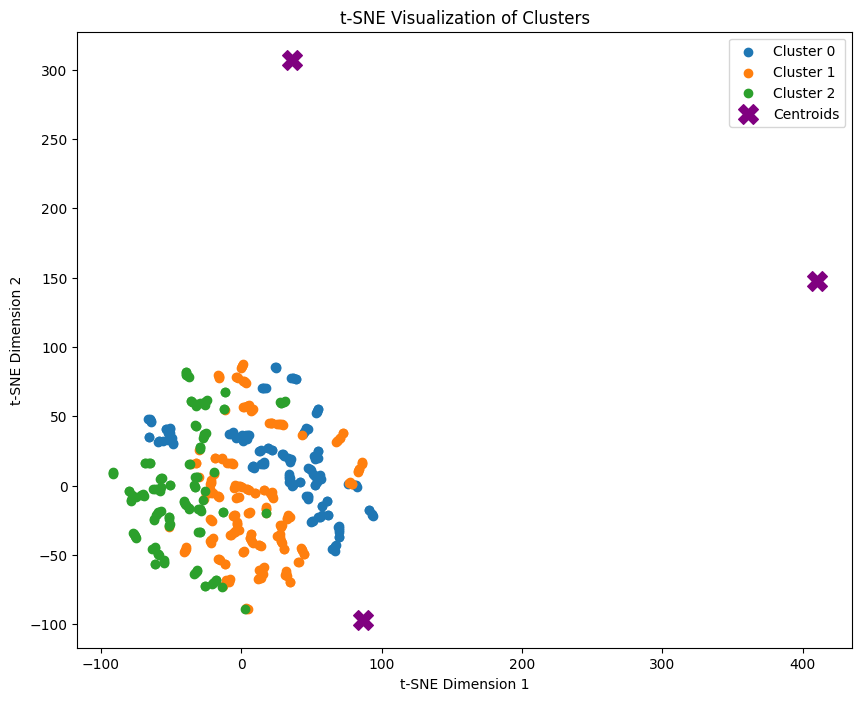

In [20]:
from sklearn.manifold import TSNE

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42, perplexity=2) # Set perplexity less than n_samples for centroids
X_tsne = tsne.fit_transform(X_scaled)

# Plot the results
plt.figure(figsize=(10, 8))
for cluster in range(3):  # Assuming 3 clusters
    cluster_points = X_tsne[df['cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')

# Plot the centroids
centroids_tsne = tsne.fit_transform(kmeans.cluster_centers_) # Apply t-SNE to centroids
plt.scatter(centroids_tsne[:, 0], centroids_tsne[:, 1], s=200, marker='X', c='purple', label='Centroids')

plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of Clusters')
plt.legend()
plt.show()

### UMAP

In [22]:
!pip install umap-learn

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


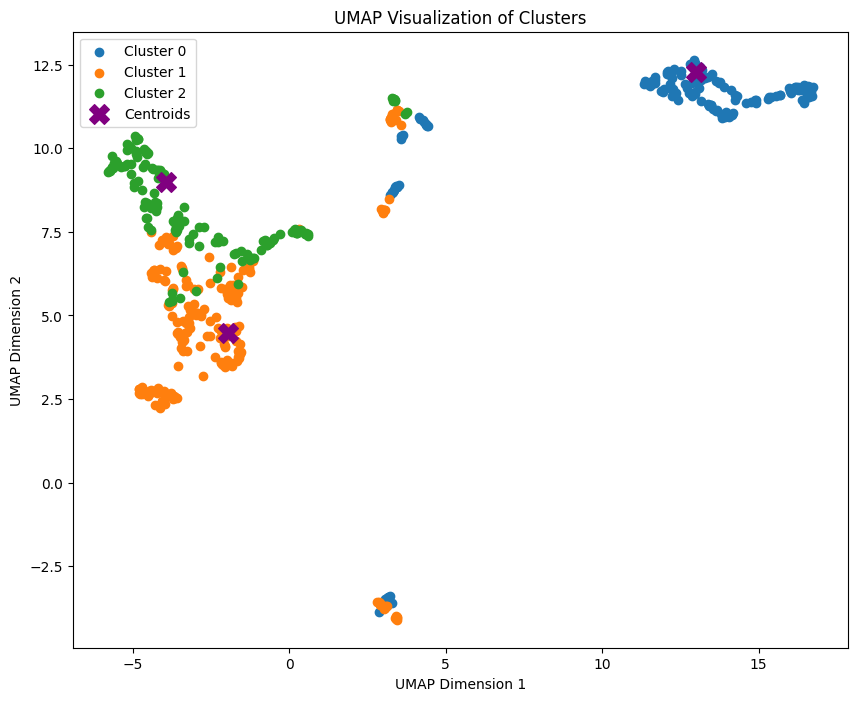

In [23]:
import umap

# Apply UMAP for dimensionality reduction
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X_scaled)

# Plot the results
plt.figure(figsize=(10, 8))
for cluster in range(3):  # Assuming 3 clusters
    cluster_points = X_umap[df['cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')

# Plot the centroids
centroids_umap = reducer.transform(kmeans.cluster_centers_) # Apply UMAP to centroids
plt.scatter(centroids_umap[:, 0], centroids_umap[:, 1], s=200, marker='X', c='purple', label='Centroids')

plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('UMAP Visualization of Clusters')
plt.legend()
plt.show()

### Isomap

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:384: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


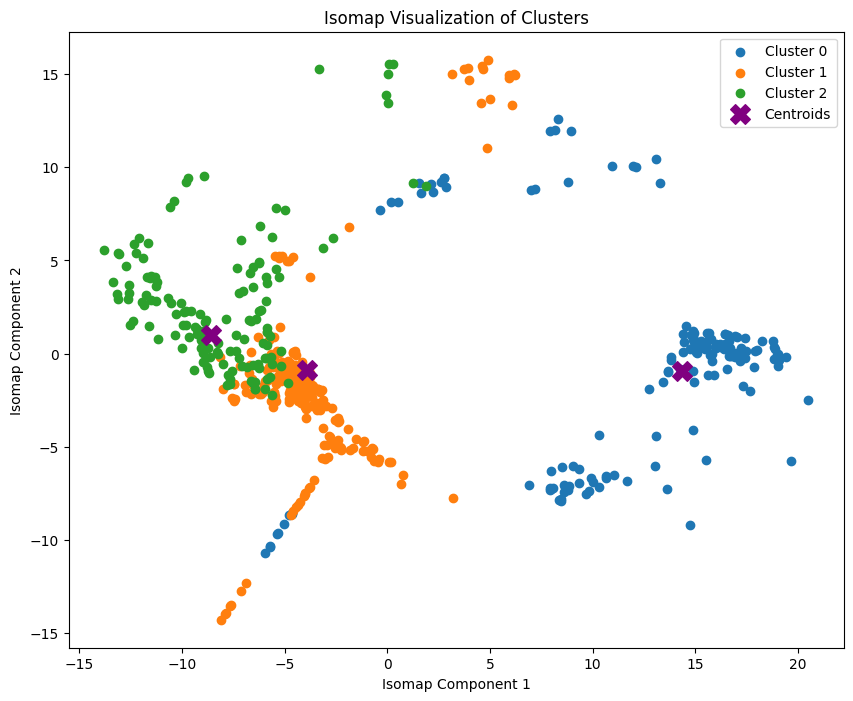

In [24]:
from sklearn.manifold import Isomap

# Apply Isomap for dimensionality reduction
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X_scaled)

# Plot the results
plt.figure(figsize=(10, 8))
for cluster in range(3):  # Assuming 3 clusters
    cluster_points = X_isomap[df['cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')

# Plot the centroids
centroids_isomap = isomap.transform(kmeans.cluster_centers_)  # Apply Isomap to centroids
plt.scatter(centroids_isomap[:, 0], centroids_isomap[:, 1], s=200, marker='X', c='purple', label='Centroids')

plt.xlabel('Isomap Component 1')
plt.ylabel('Isomap Component 2')
plt.title('Isomap Visualization of Clusters')
plt.legend()
plt.show()